# Predicting Chronic Kidney Disease with Machine Learning Techniques

## Introduction

Chronic Kidney Disease (CKD) is the loss of kidney function over a long period of time. The kidneys filter waste chemicals from the blood, secrete hormones that alter blood pressure and red blood cell production, and they regulate electrolytes. This disease affects 30 million individuals in the United States and is most often caused by diabetes and high blood pressure (About Chronic Kidney Disease, 2017).

This paper describes the process to predict the presence of Chronic Kidney Disease using machine learning techniques. The models utilized for this project are the random forest classifier and support vector machine (SVM) contained in the sklearn package. The process for this project includes exploratory data analysis, data cleansing, establishing a training and test sample, application of the machine learning model and evaluating the performance of each model.

The dataset is the "Chronic_Kidney_Disease Data Set" from the UCI Machine Learning Repository (UCI, 2015). The data consisted of 400 samples of patient data on 24 features related to chronic kidney disease. The 25th feature was the dependent variable on whether the patient had chronic kidney disease. Another aspect of this project was to compare the performance of each model on variations of the dataset. I was interested in learning if fewer samples with more features yielded different results as compared to more samples with fewer features.

### Load Libraries/Packages

In [1]:
#code from Myna (2017) 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('poster')
pd.options.display.max_rows = 500 # code from https://pandas.pydata.org/pandas-docs/stable/options.html
pd.options.display.max_columns = None # code from Isma (2017) 

In [2]:
# code from Myna (2017)
def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)
# Plot the ROC curve
    plt.figure()    
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

## Import dataset

In [3]:
# dataset taken from Myna (2017) 
df =pd.read_csv('C:/Users/maria/OneDrive/Practicum 2 MSDS 696/Project2/kidney_disease.csv')

## Exploratory Data Analysis/Data Cleansing

The description of the Chronic_Kidney_Disease Data Set was taken from the UCI Machine Learning Repository (2015).  It contains 2 months of data on hospitalized patients.  This data set contains 24 independent variables and one dependant variable which is the presence or absence of Chronic Kidney disease.  

The features included in this data set are the common tests used to diagnose kidney disease such as urine characteristics, and blood tests, as well as medical history and a few physical findings.  As the kidney function declines through progressive cellular damage, alterations in the composition of the urine, the blood chemistries, and physical features occur.

Along with the data type, I added whether the feature was related to a urine sample or blood serum.  The definition for each feature is listed below:
Attribute Information :
    1. Age(numerical)
        age in years
    2. Blood Pressure(numerical)
        bp in mm/Hg
    3. Specific Gravity(nominal) of urine
	  	sg - (1.005,1.010,1.015,1.020,1.025)
	4. Albumin(nominal)  urine 
		al - (0,1,2,3,4,5)
 	5. Sugar(nominal)  urine 
		su - (0,1,2,3,4,5)
 	6. Red Blood Cells(nominal) in urine
		rbc - (normal,abnormal)
 	7. Pus Cell (nominal) in urine
		pc - (normal,abnormal)
 	8. Pus Cell clumps(nominal) in urine
		pcc - (present,notpresent)
 	9. Bacteria(nominal) in urine
		ba  - (present,notpresent)
 	10. Blood Glucose Random(numerical) serum		
		bgr in mgs/dl
 	11. Blood Urea(numerical) serum	
		bu in mgs/dl
 	12. Serum Creatinine(numerical)	serum
		sc in mgs/dl
 	13. Sodium(numerical) serum
		sod in mEq/L
 	14. Potassium(numerical) serum	
		pot in mEq/L
 	15. Hemoglobin(numerical) serum
		hemo in gms
 	16. Packed  Cell Volume(numerical) serum
 	17. White Blood Cell Count(numerical) serum
		wc in cells/cumm
 	18. Red Blood Cell Count(numerical)	serum
		rc in millions/cmm
 	19. Hypertension(nominal) 	
		htn - (yes,no)
 	20. Diabetes Mellitus(nominal) 	
		dm - (yes,no)
 	21. Coronary Artery Disease(nominal)
		cad - (yes,no)
 	22. Appetite(nominal)	
		appet - (good,poor)
 	23. Pedal Edema(nominal)
		pe - (yes,no)	
 	24. Anemia(nominal)
		ane - (yes,no)
 	25. Class (nominal)		
		class - (ckd,notckd)


In [4]:
# examine the dataframe
# df

In [5]:
# preserve the original dataframe
df_original = df

In [6]:
df_original.head() 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
# examine the shape of the data set.
print(df.shape)

(400, 26)


In [9]:
df.index

RangeIndex(start=0, stop=400, step=1)

In [10]:
# examine the column headers
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

The dataframe contains the correct headers, however the first and second columns are both indexes.  I removed column 1 and  change nominal features to numeric in preparation for machine learning models. 

In [11]:
# Map text to 1/0 and clean data, code from Myna (2017) 
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'classif'},inplace=True)

In [12]:
# Further cleaning, code from Myna (2017)
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)

In [13]:
# change headers to sensical names
df.columns = ['age', 'bp', 'ua_spGr', 'ua_alb', 'ua_sug', 'ua_rbc', 'ua_pus', 'ua_pus_clum', 'ua_bact', 'gluc', 'bun', 'creat', 'Na', 'K', 'Hgb', 'pcv', 'wbc', 'rbc', 'htn', 'dm', 'cad', 'appet', 'edema', 'anemia', 'classif' ]

In [14]:
df.head()

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,bun,creat,Na,K,Hgb,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [15]:
# examine the information on each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age            391 non-null float64
bp             388 non-null float64
ua_spGr        353 non-null float64
ua_alb         354 non-null float64
ua_sug         351 non-null float64
ua_rbc         248 non-null float64
ua_pus         335 non-null float64
ua_pus_clum    396 non-null float64
ua_bact        396 non-null float64
gluc           356 non-null float64
bun            381 non-null float64
creat          383 non-null float64
Na             313 non-null float64
K              312 non-null float64
Hgb            348 non-null float64
pcv            330 non-null object
wbc            295 non-null object
rbc            270 non-null object
htn            398 non-null float64
dm             398 non-null float64
cad            398 non-null float64
appet          399 non-null float64
edema          399 non-null float64
anemia         399 non-null float64
classif        400 non-null float6

In [16]:
# examine the summary statistics on each feature
df.describe(include = 'all')

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,bun,creat,Na,K,Hgb,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,330,295,270,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,92,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,9800,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,11,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,NaN,NaN,NaN,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,NaN,NaN,NaN,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000


### Age feature

In [17]:
# examine the age feature
df.age.describe()

count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: age, dtype: float64

Text(0.5,0,'Years')

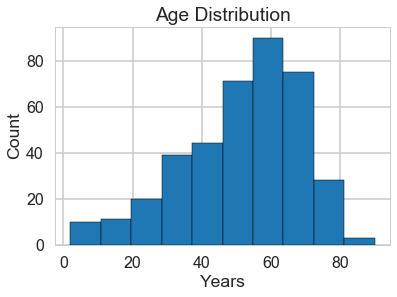

In [18]:
# code compiled from ngoldbaum (2017) 
df.hist(column='age', histtype='bar', ec='black')
plt.title('Age Distribution')
plt.ylabel ('Count')
plt.xlabel ('Years')

In [19]:
df.age.mode()

0    60.0
dtype: float64

The age range is from 1 to 90 with the mode at 60 years of age.  One value of interest is the minimal age of 2.  There is no information from the UCI website further explaining why this value is included or how the data was collected.  This value of 2 could represent an error in data collection or could represent a child.  There are several pediatric etiologies which could lead to chronic kidney disease such as inflammatory disorders such as lupus, urinary tract infections, obstructive uropathy etc.  The row with the age of 2 was called to see if there were any clues an to whether this was an error or a child.

In [20]:
# examine the row with the unusual minimal value of 2.  Code from Rood (2018).
df.loc[df['age'] == 2]

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,bun,creat,Na,K,Hgb,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
215,2.0,NaN,1.01,3.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [21]:
# examine age column for other young ages
df.age.value_counts()

60.0    19
65.0    17
48.0    12
50.0    12
55.0    12
47.0    11
62.0    10
45.0    10
54.0    10
59.0    10
56.0    10
70.0     9
34.0     9
61.0     9
46.0     9
68.0     8
73.0     8
71.0     8
64.0     8
57.0     8
63.0     7
30.0     7
72.0     7
67.0     7
69.0     6
35.0     6
33.0     6
44.0     6
42.0     6
43.0     6
58.0     5
76.0     5
41.0     5
66.0     5
75.0     5
51.0     5
52.0     5
53.0     5
23.0     4
80.0     4
24.0     4
40.0     4
39.0     4
74.0     3
38.0     3
37.0     3
32.0     3
17.0     3
25.0     3
8.0      3
29.0     3
21.0     2
5.0      2
49.0     2
15.0     2
28.0     2
12.0     2
20.0     2
36.0     2
19.0     2
82.0     1
7.0      1
2.0      1
78.0     1
90.0     1
3.0      1
6.0      1
11.0     1
4.0      1
83.0     1
27.0     1
14.0     1
81.0     1
22.0     1
26.0     1
79.0     1
Name: age, dtype: int64

There are other ages which represent children, so I will leave those in the dataset.

### BP feature

The description of the bp feature does not explain if the bp data is a systolic, diastolic or mean blood pressure reading.  The majority of the values are typical of mean blood pressure readings except for the outliers to the right of the histogram.

In [22]:
df.bp.describe()

count    388.000000
mean      76.469072
std       13.683637
min       50.000000
25%       70.000000
50%       80.000000
75%       80.000000
max      180.000000
Name: bp, dtype: float64

Text(0.5,0,'BP mm/Hg')

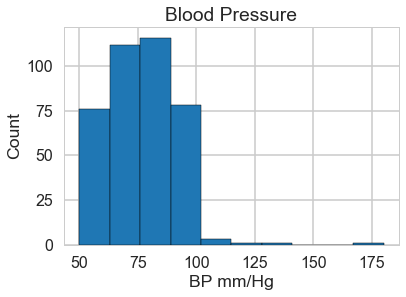

In [23]:
# code compiled from ngoldbaum (2017) 
df.hist(column='bp', ec='black')
plt.title('Blood Pressure')
plt.ylabel ('Count')
plt.xlabel ('BP mm/Hg')

### Specific Gravity feature

According to  Ghadban (2014), "Urinary specific gravity is a measure of the concentration of solutes in the urine and provides information on the kidney’s ability to concentrate urine."  The concentration of urine changes with certain etiologies.  Although there is no detailed description of this measurement, it appears to be based on the categories found on a urine dipstick.  The normal range for this test is 1.010 to 1.030 (Wikipedia, 2018).

In [24]:
df.ua_spGr.describe()

count    353.000000
mean       1.017408
std        0.005717
min        1.005000
25%        1.010000
50%        1.020000
75%        1.020000
max        1.025000
Name: ua_spGr, dtype: float64

In [25]:
# leave this code in case I need to refer to it in the future
# df.ua_spGr.value_counts().plot(kind='bar')
# plt.title('Urine Specific Gravity')
# plt.xlabel('Value')
# plt.ylabel ('Count')

Text(0.5,1,'Urine Specific Gravity')

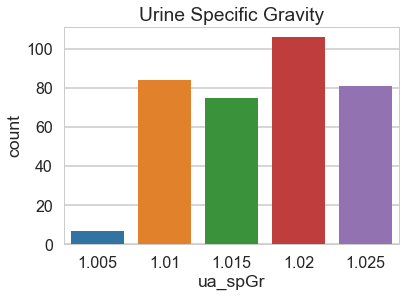

In [26]:
sns.set_style('whitegrid')
sns.countplot(df.ua_spGr)
plt.title('Urine Specific Gravity')

In [27]:
df.ua_spGr.value_counts()

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: ua_spGr, dtype: int64

The only value which maybe abnormal by some labs is the 1.005, which is more diluted urine.

### Urine Albumin feature

In [28]:
df.ua_alb.describe()

count    354.000000
mean       1.016949
std        1.352679
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: ua_alb, dtype: float64

In [29]:
df.ua_alb.value_counts()

0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: ua_alb, dtype: int64

Text(0.5,0,'Value')

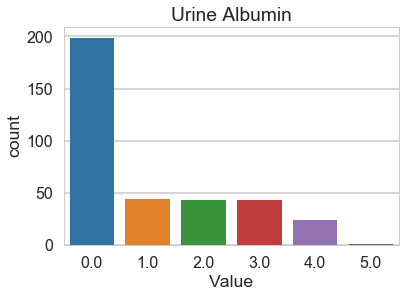

In [30]:
sns.countplot(df.ua_alb)
plt.title('Urine Albumin')
plt.xlabel('Value')

Most of the values were zero which represents a normal level of albumin (a type of protein) in the urine.

### Urine Sugar feature

In [31]:
df.ua_sug.describe()

count    351.000000
mean       0.450142
std        1.099191
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: ua_sug, dtype: float64

Text(0.5,0,'Value')

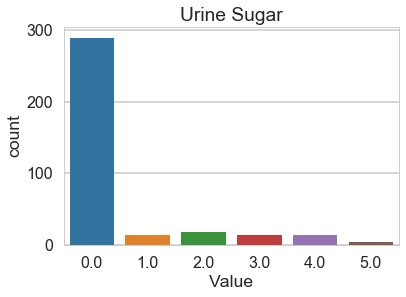

In [215]:
sns.countplot(df.ua_sug)
plt.title('Urine Sugar')
plt.xlabel ('Value')

The majority of the data set had no sugar in urine, which is normal.

### Urine Red Blood Cell feature

This feature is a categorical data where zero represents normal and one represents abnormal.

In [33]:
df.ua_rbc.describe()

count    248.000000
mean       0.189516
std        0.392711
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ua_rbc, dtype: float64

In [34]:
df.ua_rbc.value_counts()

0.0    201
1.0     47
Name: ua_rbc, dtype: int64

Text(0.5,0,'')

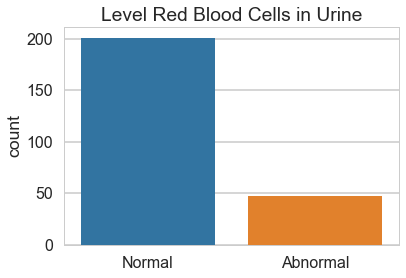

In [35]:
g = sns.countplot(df.ua_rbc).set(xticklabels=['Normal', 'Abnormal'])

plt.title('Level Red Blood Cells in Urine')
plt.xlabel ('')


### Urine Pus feature

This feature is categorical data where zero represents normal and 1 represents abnormal.

In [36]:
df.ua_pus.describe()

count    335.000000
mean       0.226866
std        0.419431
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ua_pus, dtype: float64

In [37]:
df.ua_pus.value_counts()

0.0    259
1.0     76
Name: ua_pus, dtype: int64

Text(0.5,0,'')

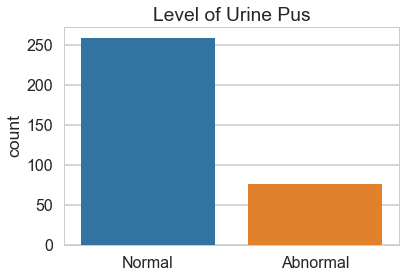

In [38]:
sns.countplot(df.ua_pus).set(xticklabels=['Normal', 'Abnormal'])
plt.title('Level of Urine Pus')
plt.xlabel ('')

A majority of the samples had a normal result for pus in the urine.

### Urine Pus Clumps feature

This feature is categorical data where zero represents not present and 1 represents present.

In [39]:
df.ua_pus_clum.value_counts()

0.0    354
1.0     42
Name: ua_pus_clum, dtype: int64

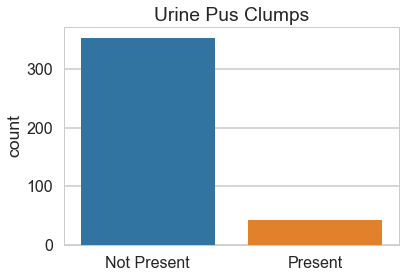

In [40]:
sns.countplot(df.ua_pus_clum).set(xticklabels=['Not Present', 'Present'])
# x = [0,1]
# plt.xticks(x, ('Not Present', 'Present'))

plt.xlabel ('')
plt.title('Urine Pus Clumps')
plt.show()

Most of the examples did not have pus clumps present in the urine.

### Urine Bacteria feature

This feature is categorical data where zero represents not present and 1 represents present.

In [41]:
df.ua_bact.value_counts()

0.0    374
1.0     22
Name: ua_bact, dtype: int64

In [42]:
# To examine the percent for each category
df.ua_bact.value_counts()/len(df)*100

0.0    93.5
1.0     5.5
Name: ua_bact, dtype: float64

Text(0.5,0,'')

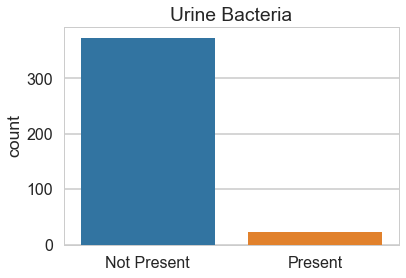

In [43]:
sns.countplot(df.ua_bact).set(xticklabels=['Not Present', 'Present'])

plt.title('Urine Bacteria')
plt.xlabel ('')

Most of the samples did not have bacteria in the urine which is normal.  Only 5.5% of the samples had bacteria in the urine.

### Blood Glucose feature

The blood glucose is at measure of the amount of sugar in the blood vesses and is measured in milligrams per deciliter (mg/dl).  The normal range for a fasting blood sugar is 70-99.  The dataset does  specify that the glucose is a random sample which is not a fasting level.  Individuals with diabetes have elevated fasting and non-fasting blood glucose levels.  This feature is a numerical data type.

In [44]:
df.gluc.describe()

count    356.000000
mean     148.036517
std       79.281714
min       22.000000
25%       99.000000
50%      121.000000
75%      163.000000
max      490.000000
Name: gluc, dtype: float64

Text(0.5,0,'mg/dl')

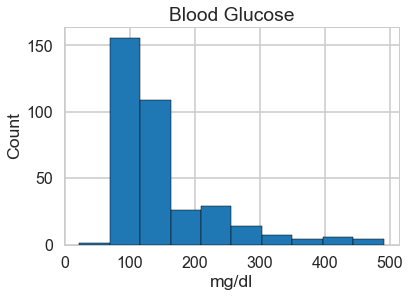

In [45]:
# code compiled from ngoldbaum (2017) 
df.hist(column='gluc', histtype='bar', ec='black')
plt.title('Blood Glucose')
plt.ylabel ('Count')
plt.xlabel ('mg/dl')

In [46]:
df.gluc.mode()

0    99.0
dtype: float64

Most of the examples had a normal glucose level with the mode at 99.  There is a minimum value of 22 which is very low and could be a valid number for this test.

### Blood Urea Nitrogen feature

The blood urea nitrogen test is used to evaluate kidney function along with the creatinine test. According to the Mayo Clinic, the normal range for the BUN is around 7 mgs/dl to 20 mgs/dl.  The highter the value the worse the kidney function as the the kidneys are not able to filter out the urea nitrogen from the blood.  This data is numerical type.

In [47]:
df.bun.describe()

count    381.000000
mean      57.425722
std       50.503006
min        1.500000
25%       27.000000
50%       42.000000
75%       66.000000
max      391.000000
Name: bun, dtype: float64

Text(0.5,0,'mgs/dl')

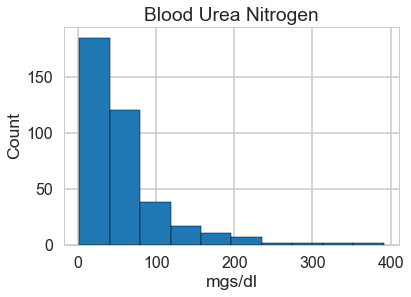

In [48]:
# code compiled from ngoldbaum (2017) at https://stackoverflow.com/questions/42542252/cannot-get-histogram-to-show-separated-bins-with-vertical-lines
df.hist(column='bun', histtype='bar', ec='black')
plt.title('Blood Urea Nitrogen')
plt.ylabel ('Count')
plt.xlabel ('mgs/dl')

In [49]:
# code adopted from jezrael (2017)
normal_bun =  (df['bun'] < 20).value_counts()
normal_bun

False    354
True      46
Name: bun, dtype: int64

Most of the individuals had an elevated BUN level which is consistent with chronic kidney disease.  The max level of 300 and 391 are unusually high by may be possible if the individual has large muscle mass.

### Creatinine feature

Creatinine is a chemical that comes from the breakdown of protein in the body.  It is also considered a waste product of metabolism  and is usually present in small amounts in the blood.  According to Davis & Shiel the normal level of blood creatinine is 0.6 to 1.2 mg/dL.  The higher the value the worse the kidney function.  This feature is a numerical data type.

In [50]:
df.creat.describe()

count    383.000000
mean       3.072454
std        5.741126
min        0.400000
25%        0.900000
50%        1.300000
75%        2.800000
max       76.000000
Name: creat, dtype: float64

In [51]:
df.creat.mode()

0    1.2
dtype: float64

Text(0.5,0,'mgs/dl')

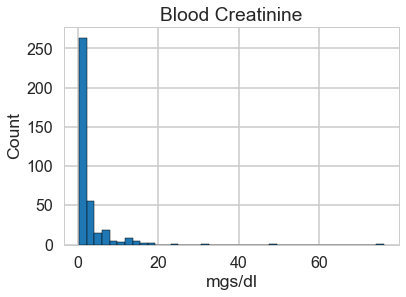

In [52]:
# code compiled from ngoldbaum (2017) 
df.hist(column='creat', histtype='bar', ec='black', bins = 40)
plt.title('Blood Creatinine')
plt.ylabel ('Count')
plt.xlabel ('mgs/dl')

In [53]:
normal_creat =  (df['creat'] < 1.2).value_counts()
normal_creat

False    250
True     150
Name: creat, dtype: int64

In [54]:

normal_creat/len(df)*100

False    62.5
True     37.5
Name: creat, dtype: float64

Most of the individuals had did not have a normal creatinine level.  Chronic kidney disease patients have elevated serum creatinine and blood urea nitrogen levels.

### Sodium feature

This feature is the value of sodium or salt in the blood which is an electrolyte.  The normal range is 135 - 145 mg/dl. This feature is a numeric data type.

In [55]:
df.Na.describe()

count    313.000000
mean     137.528754
std       10.408752
min        4.500000
25%      135.000000
50%      138.000000
75%      142.000000
max      163.000000
Name: Na, dtype: float64

Text(0.5,0,'mgs/dl')

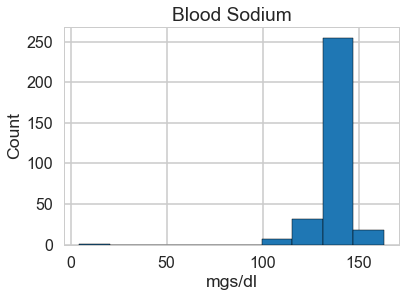

In [56]:
# code compiled from ngoldbaum (2017) 
df.hist(column='Na', histtype='bar', ec='black')
plt.title('Blood Sodium')
plt.ylabel ('Count')
plt.xlabel ('mgs/dl')

Most of the examples had a normal serum sodium level.  The minimal value of 4.5 is unusually low and is an error.

In [57]:
df.loc[df['Na'] == 4.5]

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,bun,creat,Na,K,Hgb,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
21,60.0,90.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,180.0,76.0,4.5,NaN,10.9,32,6200,3.6,1.0,1.0,1.0,1.0,0.0,0.0,1.0


### Potassium feature

The normal range for serum potassium (which is an electrolyte) is 3.5 - 5.5 mEq/L.  Levels above 6 are critical and can alter the electrical conduction of the heart and cause life threatening arrhythmias.  Individuals with later stages of CKD often have elevated serum potassium levels due to kidney damage.  This feature is a numeric data type.

In [58]:
df.K.describe()

count    312.000000
mean       4.627244
std        3.193904
min        2.500000
25%        3.800000
50%        4.400000
75%        4.900000
max       47.000000
Name: K, dtype: float64

In [59]:
df.K.value_counts()

5.0     30
3.5     30
4.9     27
4.7     17
4.8     16
4.1     14
4.2     14
4.4     14
4.0     14
3.8     14
3.9     14
4.5     13
4.3     12
3.7     12
3.6      8
4.6      7
3.4      5
5.2      5
5.7      4
5.3      4
5.5      3
5.4      3
3.2      3
6.3      3
2.9      3
3.3      3
3.0      2
6.5      2
5.9      2
2.5      2
5.8      2
5.6      2
2.7      1
7.6      1
47.0     1
6.4      1
2.8      1
39.0     1
5.1      1
6.6      1
Name: K, dtype: int64

Text(0.5,0,'mEq/L')

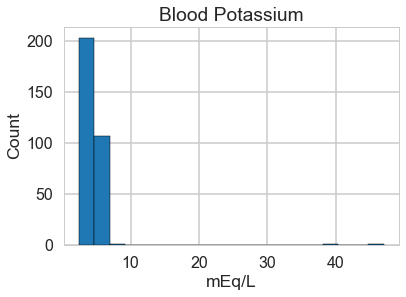

In [60]:
# code compiled from ngoldbaum (2017) 
df.hist(column='K', histtype='bar', bins = 20, ec='black')
plt.title('Blood Potassium')
plt.ylabel ('Count')
plt.xlabel ('mEq/L')

Most of the examples had a normal serum potassium level.  The values of 39 and 47.0 are most likely errors as these values are not valid numbers for this test and incompatabile with life. The values should probably be 4.7 and 3.9 and I will correct these.

In [61]:
# find the location of the erroneous potassium level
df.loc[df['K'] == 39]

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,bun,creat,Na,K,Hgb,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
61,67.0,80.0,1.01,1.0,3.0,0.0,1.0,0.0,0.0,182.0,391.0,32.0,163.0,39.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [62]:
# replace the incorrect value with the correct value
df['K'] = df['K'].replace([39], 3.9)

In [63]:
df['K'] = df['K'].replace([47], 4.7)

In [64]:
# check to make sure the erroneous data was removed.
df.loc[df['K'] == 39]

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,bun,creat,Na,K,Hgb,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif


In [65]:
df.K.value_counts()

3.5    30
5.0    30
4.9    27
4.7    18
4.8    16
3.9    15
4.4    14
4.2    14
4.1    14
3.8    14
4.0    14
4.5    13
3.7    12
4.3    12
3.6     8
4.6     7
3.4     5
5.2     5
5.3     4
5.7     4
5.5     3
5.4     3
3.2     3
3.3     3
2.9     3
6.3     3
5.6     2
5.8     2
6.5     2
3.0     2
5.9     2
2.5     2
6.6     1
7.6     1
5.1     1
2.8     1
2.7     1
6.4     1
Name: K, dtype: int64

Text(0.5,0,'mEq/L')

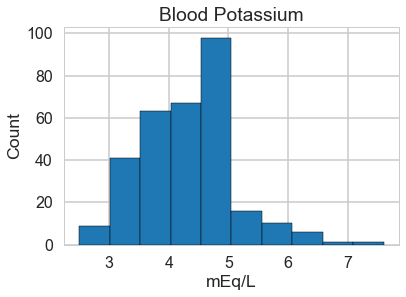

In [66]:
# histogram code compiled from ngoldbaum (2017) 
df.hist(column='K', histtype='bar', bins = 10, ec='black')
plt.title('Blood Potassium')
plt.ylabel ('Count')
plt.xlabel ('mEq/L')

The above histogram provides a more accurate distribution after correcting the erroneous values for the potassium.

### Hemoglobin (Hgb) feature

The hemoglobin is a measure of red blood cell count.  According to the Mayo Clinic, "The normal range for hemoglobin in men is 13.5 to 17.5 grams per deciliter and for women it is 12.0 to 15.5 grams per deciliter.  The normal range varys with gender and age.

In [67]:
df.Hgb.describe()

count    348.000000
mean      12.526437
std        2.912587
min        3.100000
25%       10.300000
50%       12.650000
75%       15.000000
max       17.800000
Name: Hgb, dtype: float64

Text(0.5,0,'grams')

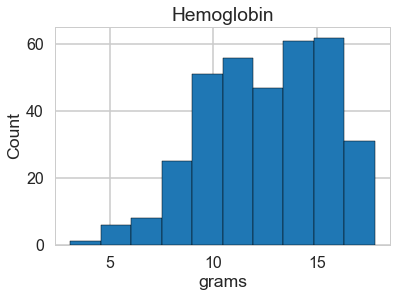

In [68]:
# histogram code compiled from ngoldbaum (2017) 
df.hist(column='Hgb', histtype='bar', bins = 10, ec='black')
plt.title('Hemoglobin')
plt.ylabel ('Count')
plt.xlabel ('grams')

### Packed Cell Volume (pcv) feature

 According to Hematocrit (n.d.) the packed cell volume is another name for the hematocrit and "is the volume percentage (vol%) of red blood cells in blood. It is normally 47% +-5% for men and 42% +-5% for women."  This test is not used as often as the previous test in diagnosing CKD.

In [69]:
df.pcv.describe()

count     330
unique     44
top        41
freq       21
Name: pcv, dtype: object

In [70]:
df.pcv.head()

0    44
1    38
2    31
3    32
4    35
Name: pcv, dtype: object

### White Blood Cell Count  (WBC) feature

This feature is the number of white blood cells in the blood.  The normal range varys with age and gender but is near the range of 4,500 to 10,000 mcg/L.

In [71]:
df.wbc.describe()

count      295
unique      92
top       9800
freq        11
Name: wbc, dtype: object

In [72]:
df.wbc.value_counts()

9800      11
6700      10
9200       9
7200       9
9600       9
6900       8
5800       8
11000      8
7000       7
7800       7
9100       7
9400       7
10700      6
10500      6
6300       6
4300       6
8100       5
8600       5
7500       5
5000       5
8300       5
7900       5
5600       5
9500       5
10200      5
6500       4
7700       4
6200       4
5500       4
10400      4
6000       4
6800       4
10300      4
4700       4
7300       3
7400       3
5400       3
6400       3
8400       3
4200       3
8000       3
4500       3
8500       2
6600       2
7100       2
5700       2
14600      2
12800      2
15200      2
8800       2
9000       2
13200      2
3800       2
8200       2
12400      2
9300       2
5300       2
11400      2
11900      1
2600       1
21600      1
19100      1
4100       1
9700       1
10900      1
11500      1
16700      1
\t?        1
13600      1
16300      1
11800      1
5200       1
9900       1
11300      1
10800      1
\t6200     1
2200       1

There are 2 values that look invalid, they are /t8400 and /t6200.

In [73]:
df.loc[df['wbc'] == '\t6200']

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,bun,creat,Na,K,Hgb,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
76,48.0,80.0,1.005,4.0,0.0,1.0,1.0,0.0,1.0,133.0,139.0,8.5,132.0,5.5,10.3,36,\t6200,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [74]:
pd.set_option('display.max_rows', 500)

In [75]:
df['wbc']

0        7800
1        6000
2        7500
3        6700
4        7300
5        7800
6         NaN
7        6900
8        9600
9       12100
10        NaN
11       4500
12      12200
13        NaN
14      11000
15       3800
16        NaN
17        NaN
18      11400
19       5300
20       9200
21       6200
22       6900
23        NaN
24       8300
25       8400
26      10300
27       9600
28        NaN
29        NaN
30        NaN
31       7800
32       9600
33        NaN
34        NaN
35       9800
36        NaN
37       6900
38        NaN
39       9800
40       9100
41        NaN
42       9200
43       7900
44        NaN
45        NaN
46       6400
47       8600
48      18900
49      21600
50      11000
51        NaN
52       4300
53       8500
54       9800
55        NaN
56      11300
57        NaN
58       7200
59        NaN
60        NaN
61        NaN
62       7700
63        NaN
64        NaN
65        NaN
66        NaN
67        NaN
68        NaN
69       6900
70       8300
71    

In [76]:
# remove /t from some wbc values, code from McKinney (2012)
df['wbc'] = df['wbc'].str.lstrip('\t')

In [77]:
df.wbc.value_counts()

9800     11
6700     10
9200      9
7200      9
9600      9
6900      8
5800      8
11000     8
7800      7
9100      7
9400      7
7000      7
10700     6
10500     6
4300      6
6300      6
7500      5
5600      5
7900      5
6200      5
10200     5
9500      5
8100      5
8300      5
8600      5
5000      5
5500      4
6000      4
4700      4
10400     4
10300     4
6500      4
7700      4
6800      4
8400      4
4200      3
6400      3
7300      3
5400      3
7400      3
4500      3
8000      3
9000      2
8800      2
7100      2
14600     2
5700      2
12400     2
15200     2
5300      2
9300      2
11400     2
6600      2
8200      2
13200     2
12800     2
3800      2
8500      2
16700     1
16300     1
13600     1
9900      1
?         1
9700      1
11300     1
21600     1
10800     1
5200      1
11500     1
18900     1
10900     1
5100      1
11900     1
12100     1
2200      1
2600      1
11800     1
12200     1
14900     1
12700     1
15700     1
12300     1
4900      1
2640

In [78]:
# repace ? with NaN
df = df.replace('?', np.NaN)

In [79]:
# df.wbc.value_counts()

In [80]:
 # df.hist(column='wbc')

### Red Blood Cell (rbc) feature

The red blood cell test is a count of red blood cells.  The normal range is near 4 to 5 million cells/microliter but also varys with age and gender (Complete blood count (CBC), 2018).

In [81]:
df.rbc.describe()

count     270
unique     46
top       5.2
freq       18
Name: rbc, dtype: object

In [82]:
df.rbc.value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
5      10
3.9    10
4.6     9
3.4     9
6.1     8
5.9     8
5.5     8
3.7     8
5.4     7
3.8     7
5.8     7
5.3     7
4.3     6
4       6
4.2     6
5.6     6
4.1     5
6.5     5
5.7     5
3.2     5
6.4     5
6.2     5
4.4     5
5.1     5
6       4
6.3     4
3.6     4
3       3
3.3     3
3.5     3
2.6     2
3.1     2
2.7     2
2.1     2
2.9     2
2.8     2
2.5     2
8       1
2.3     1
2.4     1
\t?     1
Name: rbc, dtype: int64

In [83]:
df = df.replace('\t?', np.NaN)

In [84]:
df.rbc.value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
3.9    10
4.8    10
5      10
4.6     9
3.4     9
6.1     8
5.9     8
5.5     8
3.7     8
5.4     7
3.8     7
5.8     7
5.3     7
5.6     6
4.3     6
4       6
4.2     6
6.5     5
5.7     5
6.4     5
6.2     5
4.4     5
3.2     5
5.1     5
4.1     5
6       4
6.3     4
3.6     4
3.3     3
3.5     3
3       3
2.5     2
2.6     2
3.1     2
2.7     2
2.1     2
2.9     2
2.8     2
8       1
2.3     1
2.4     1
Name: rbc, dtype: int64

### Hypertension Feature

Hypertensions is a presistent elevated blood pressure greater than 140/90 mm/Hg.  It is one of the major causes of chronic kidney disease as elevated pressures within the blood vessels inside the kidneys leads to destruction of glomeruli which filter the blood.  This feature is a nominal data type where zero represents no hypertension and one represents yes, the individual has hypertension.

In [85]:
df.htn.describe()

count    398.000000
mean       0.369347
std        0.483235
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: htn, dtype: float64

In [86]:
# to examine the number of individuals that had hypertension.
df.htn.value_counts()

0.0    251
1.0    147
Name: htn, dtype: int64

In [87]:
# df.htn.value_counts().plot(kind = 'bar')

Text(0.5,0,'')

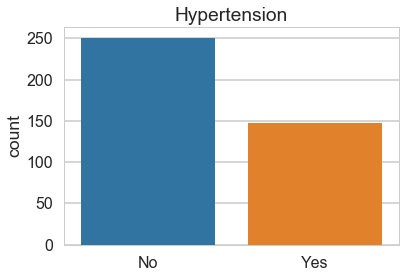

In [88]:
sns.countplot(df.htn).set(xticklabels=['No', 'Yes'])
plt.title('Hypertension')
plt.xlabel ('')

A majority of the individuals did not have hypertension.

### Diabetes Feature

Diabetes is a disease where there is persistent elevated levels of blood glucose or sugar.  This feature identifies which individuals had a diagnosis of diabetes.  Zero represents no diabetes and 1 represents yes, the patient had diabetes.

In [89]:
df.dm.describe()

count    398.000000
mean       0.344221
std        0.475712
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: dm, dtype: float64

In [90]:
df.dm.value_counts()

0.0    261
1.0    137
Name: dm, dtype: int64

261 individuals did not have Diabetes and 137 did.

Text(0.5,0,'')

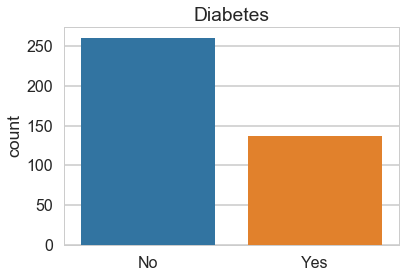

In [91]:
sns.countplot(df.dm).set(xticklabels=['No', 'Yes'])

plt.title('Diabetes')
plt.xlabel ('')

Most the patients did not have diabetes.

### Coronary Artery Disease feature

This feature is a nominal data type where zero indicates no coronary artery disease and one indicates yes, the person had coronary artery disease.

In [92]:
df.cad.describe()

count    398.000000
mean       0.085427
std        0.279868
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: cad, dtype: float64

In [93]:
df.cad.value_counts()

0.0    364
1.0     34
Name: cad, dtype: int64

Text(0.5,0,'')

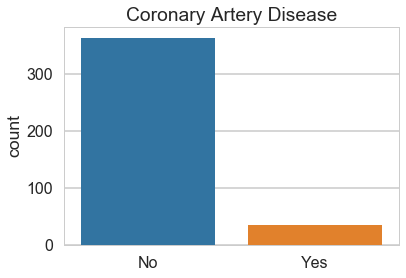

In [94]:
sns.countplot(df.cad).set(xticklabels=['No', 'Yes'])

plt.title('Coronary Artery Disease')
plt.xlabel ('')

Most of the individuals did not have coronary artery disease.

In [95]:
# examining all of the rows where cad was present to see if they also had ckd.
df.loc[df['cad'] == 1]

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,bun,creat,Na,K,Hgb,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
12,68.0,70.0,1.015,3.0,1.0,NaN,0.0,1.0,0.0,208.0,72.0,2.1,138.0,5.8,9.7,28,12200,3.4,1.0,1.0,1.0,0.0,1.0,0.0,1.0
13,68.0,70.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98.0,86.0,4.6,135.0,3.4,9.8,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,0.0,1.0
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
18,60.0,100.0,1.025,0.0,3.0,NaN,0.0,0.0,0.0,263.0,27.0,1.3,135.0,4.3,12.7,37,11400,4.3,1.0,1.0,1.0,1.0,0.0,0.0,1.0
19,62.0,60.0,1.015,1.0,0.0,NaN,1.0,1.0,0.0,100.0,31.0,1.6,NaN,NaN,10.3,30,5300,3.7,1.0,0.0,1.0,1.0,0.0,0.0,1.0
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0
21,60.0,90.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,180.0,76.0,4.5,NaN,10.9,32,6200,3.6,1.0,1.0,1.0,1.0,0.0,0.0,1.0
27,69.0,70.0,1.010,3.0,4.0,0.0,1.0,0.0,0.0,264.0,87.0,2.7,130.0,4.0,12.5,37,9600,4.1,1.0,1.0,1.0,1.0,1.0,0.0,1.0
29,68.0,70.0,1.005,1.0,0.0,1.0,1.0,1.0,0.0,NaN,28.0,1.4,NaN,NaN,12.9,38,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0
54,63.0,80.0,1.010,2.0,2.0,0.0,NaN,0.0,0.0,NaN,NaN,3.4,136.0,4.2,13.0,40,9800,4.2,1.0,0.0,1.0,1.0,0.0,0.0,1.0


34 rows out of 400 have CAD, which is 8.5% of the sample group.  All the individuals that have CAD also have CKD.  People who have CKD are at higher risk for CAD as compared to those individuals without CKD.

### Appetite feature

The appetite feature is a nominal data type where zero represents poor appetite and one represents a good appetite.

In [96]:
df.appet.describe()

count    399.000000
mean       0.794486
std        0.404584
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: appet, dtype: float64

In [97]:
df.appet.value_counts()

1.0    317
0.0     82
Name: appet, dtype: int64

In [98]:
# df.appet.value_counts().plot(kind = 'bar')

Text(0.5,0,'')

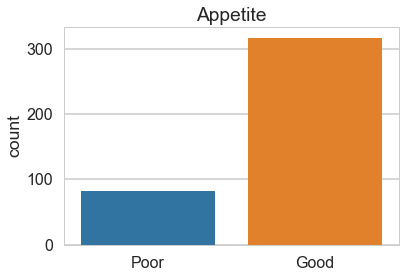

In [99]:
sns.countplot(df.appet).set(xticklabels=['Poor', 'Good'])

plt.title('Appetite')
plt.xlabel ('')

The late stages of chronic kideny disease are often associated with a poor appetite due to the accumulation of waste chemicals such as urea and creatinine in the blood.  In this dataset, most of the individuals had a good appetite.

### Pedal Edema feature

Pedal edema is swelling in the feet.  This feature is a nominal data type where zero indicates no pedal edema and one indicates yes, the individual has pedal edema.  Swelling in the feet is seen in patients with CKD when the kidneys are not able to eliminate enough water out of the body or more fluid seeps into the interstitual spaces due low blood albumin levels.

In [100]:
df.edema.describe()

count    399.000000
mean       0.190476
std        0.393170
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: edema, dtype: float64

In [101]:
df.edema.value_counts()

0.0    323
1.0     76
Name: edema, dtype: int64

In [102]:
# df.edema.value_counts().plot(kind = 'bar')

Text(0.5,0,'')

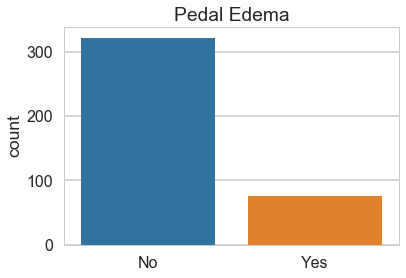

In [103]:
sns.countplot(df.edema).set(xticklabels=['No', 'Yes'])

plt.title('Pedal Edema')
plt.xlabel ('')

19% of the patients had pedal edema.  Most of them did not.

### Dependent Variable - Classif

The dependent or target feature is the "classif"  which classifies whether a patient has CKD or not.  Zero indicates no CKD and one indicates yes, the person has CKD

In [104]:
df.classif.describe()

count    400.000000
mean       0.625000
std        0.484729
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: classif, dtype: float64

In [105]:
df.classif.value_counts()

1.0    250
0.0    150
Name: classif, dtype: int64

In [106]:
# df.classif.value_counts().plot(kind = 'bar')

Text(0.5,0,'')

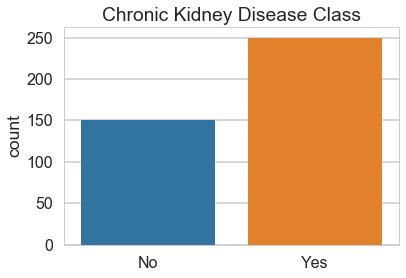

In [107]:
sns.countplot(df.classif).set(xticklabels=['No', 'Yes'])
plt.title('Chronic Kidney Disease Class')
plt.xlabel ('')

62.5% of the patients in this data frame had CKD.

### Anemia Feature

Anemia is often diagnosed by a low hemaglobin or red blood cell count.  This is a nominal feature where zero represents no anemia and one represents yes, the patient had anemia.  Anemia is often associated with CKD due to the reduced secretion of erythropoetin hormone by the damaged kidneys.

In [108]:
df.anemia.describe()

count    399.000000
mean       0.150376
std        0.357888
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: anemia, dtype: float64

In [109]:
df.anemia.value_counts()

0.0    339
1.0     60
Name: anemia, dtype: int64

Text(0.5,0,'')

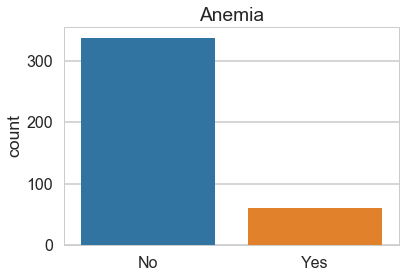

In [110]:
sns.countplot(df.anemia).set(xticklabels=['No', 'Yes'])
plt.title('Anemia')
plt.xlabel ('')

Most of the patients did not have anemia.  15% of the patients did.

In [111]:
 df.loc[df['anemia'] == 1]

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,bun,creat,Na,K,Hgb,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.80,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.80,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,138.0,60.0,1.90,NaN,NaN,10.8,33,9600,4,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,107.0,7.20,114.0,3.7,9.5,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
10,50.0,60.0,1.010,2.0,4.0,NaN,1.0,1.0,0.0,490.0,55.0,4.00,NaN,NaN,9.4,28,NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,1.0
15,40.0,80.0,1.015,3.0,0.0,NaN,0.0,0.0,0.0,76.0,162.0,9.60,141.0,4.9,7.6,24,3800,2.8,1.0,0.0,0.0,1.0,0.0,1.0,1.0
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,148.0,3.90,135.0,5.2,7.7,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0
22,48.0,80.0,1.025,4.0,0.0,0.0,1.0,0.0,0.0,95.0,163.0,7.70,136.0,3.8,9.8,32,6900,3.4,1.0,0.0,0.0,1.0,0.0,1.0,1.0
23,21.0,70.0,1.010,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,61.0,60.0,1.025,0.0,0.0,NaN,0.0,0.0,0.0,108.0,75.0,1.90,141.0,5.2,9.9,29,8400,3.7,1.0,1.0,0.0,1.0,0.0,1.0,1.0


All of the individuals that had anemia also had CKD.

## Data Cleansing

The first step in the data cleansing process was to examine the number of missing values in the dataset.

## Missing Values

In [112]:
#Examine the number of missing values for each feature.
df.isnull().sum() 

age              9
bp              12
ua_spGr         47
ua_alb          46
ua_sug          49
ua_rbc         152
ua_pus          65
ua_pus_clum      4
ua_bact          4
gluc            44
bun             19
creat           17
Na              87
K               88
Hgb             52
pcv             71
wbc            106
rbc            131
htn              2
dm               2
cad              2
appet            1
edema            1
anemia           1
classif          0
dtype: int64

In [113]:
# to get percentage missing values by dataFrame column, code from McMaster (2017) 
df.isnull().sum()/len(df)*100

age             2.25
bp              3.00
ua_spGr        11.75
ua_alb         11.50
ua_sug         12.25
ua_rbc         38.00
ua_pus         16.25
ua_pus_clum     1.00
ua_bact         1.00
gluc           11.00
bun             4.75
creat           4.25
Na             21.75
K              22.00
Hgb            13.00
pcv            17.75
wbc            26.50
rbc            32.75
htn             0.50
dm              0.50
cad             0.50
appet           0.25
edema           0.25
anemia          0.25
classif         0.00
dtype: float64

In [114]:
df.shape[0] - df.dropna().shape[0] # to find the number of rows with missing data, code from Edchum (2015)

242

In [115]:
df2 = df.dropna() # to find number of complete cases and remove all rows with NaN.

In [116]:
print(df2.shape) # to find number of complete cases

(158, 25)


In [117]:
# to check if all NaNs are removed
df2.isnull().sum() 

age            0
bp             0
ua_spGr        0
ua_alb         0
ua_sug         0
ua_rbc         0
ua_pus         0
ua_pus_clum    0
ua_bact        0
gluc           0
bun            0
creat          0
Na             0
K              0
Hgb            0
pcv            0
wbc            0
rbc            0
htn            0
dm             0
cad            0
appet          0
edema          0
anemia         0
classif        0
dtype: int64

All Nans are removed leaving 158 rows with completed cases including all features.  

In [118]:
df2.classif.describe()

count    158.000000
mean       0.272152
std        0.446483
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: classif, dtype: float64

In [119]:
# examine the percent of class labels or target feature.
df2.classif.value_counts()/len(df2)*100

0.0    72.78481
1.0    27.21519
Name: classif, dtype: float64

In [120]:
# examine the count of class labels
df2.classif.value_counts()

0.0    115
1.0     43
Name: classif, dtype: int64

27% of the dataframe examples had CKD.

In [121]:
# df2.classif.value_counts().plot(kind = 'bar')

Text(0.5,0,'')

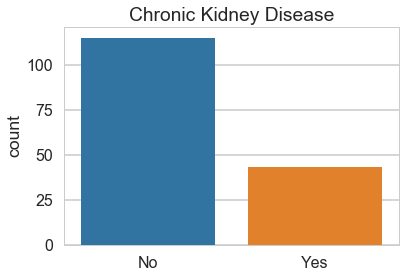

In [122]:
sns.countplot(df2.classif).set(xticklabels=['No', 'Yes'])
plt.title('Chronic Kidney Disease')
plt.xlabel ('')

In [123]:
# examine the summary statistics of df2 dataframe.
df2.describe(include = 'all')

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,bun,creat,Na,K,Hgb,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158,158,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,69,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,6700,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,7,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.563291,74.050633,1.019873,0.797468,0.253165,0.113924,0.183544,0.088608,0.075949,131.341772,52.575949,2.188608,138.848101,4.368987,13.687342,NaN,NaN,NaN,0.215190,0.177215,0.069620,0.879747,0.126582,0.101266,0.272152
std,15.512244,11.175381,0.005499,1.413130,0.813397,0.318729,0.388343,0.285080,0.265759,64.939832,47.395382,3.077615,7.489421,0.762906,2.882204,NaN,NaN,NaN,0.412261,0.383065,0.255315,0.326292,0.333562,0.302640,0.446483
min,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000


### Correlations df2 (complete cases only)

The next step was to check out the correlations among the all features.

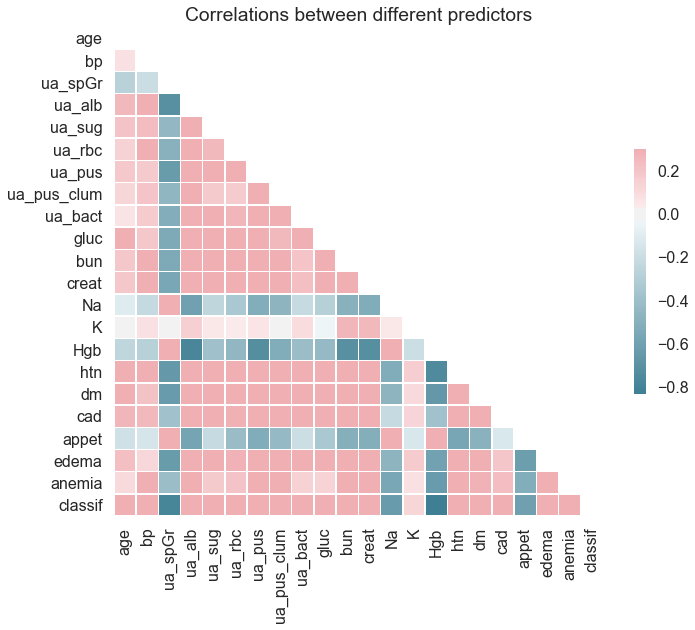

In [124]:
# code from Myna (2017) 
corr_df = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

The above chart shows that the features with a high correlation with the class feature are urine specific gravity (ua_spGr) sodium (Na), hemoglobine (Hgb),and appetite (appet).

### Train and Test set

The next phase of the project was to establish the training data and testing data for the random forest and support vector machine models.  The test data was set at 33% of the total df2 dataframe rows.  Once these two samples were created, I then examined each of them and verified that they were set up correctly.

In [125]:
# code from Myna (2017) 
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2['classif'], 
                                                    test_size = 0.33, random_state=44,
                                                   stratify= df2['classif'] )

In [126]:
# examine the training data.
X_train.head()

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,bun,creat,Na,K,Hgb,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia
317,58.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,102.0,48.0,1.2,139.0,4.3,15.0,40,8100,4.9,0.0,0.0,0.0,1.0,0.0,0.0
296,41.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,125.0,38.0,0.6,140.0,5.0,16.8,41,6300,5.9,0.0,0.0,0.0,1.0,0.0,0.0
157,62.0,70.0,1.025,3.0,0.0,0.0,1.0,0.0,0.0,122.0,42.0,1.7,136.0,4.7,12.6,39,7900,3.9,1.0,1.0,0.0,1.0,0.0,0.0
258,42.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,98.0,20.0,0.5,140.0,3.5,13.9,44,8400,5.5,0.0,0.0,0.0,1.0,0.0,0.0
291,47.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,124.0,44.0,1.0,140.0,4.9,14.9,41,7000,5.7,0.0,0.0,0.0,1.0,0.0,0.0


In [127]:
print(X_train.shape)

(105, 24)


In [128]:
print(X_test.shape)

(53, 24)


In [129]:
y_train.head()

317    0.0
296    0.0
157    1.0
258    0.0
291    0.0
Name: classif, dtype: float64

In [130]:
print(y_train.shape)

(105,)


In [131]:
print(y_test.shape)

(53,)


In [132]:
y_train.value_counts()

0.0    76
1.0    29
Name: classif, dtype: int64

In [133]:
# examine the percent of class labels for y train set.
y_train.value_counts()/len(y_train)*100

0.0    72.380952
1.0    27.619048
Name: classif, dtype: float64

The above counts for the dependent variable are similar to the df2 dataset.

### Run Random Forest on df2

The next step was to apply the random forest model to the training and test data.

In [134]:
#instantiates the model
clf = RandomForestClassifier(random_state = 22)

In [135]:
# fit the model on training data
clf_fitted = clf.fit(X_train, y_train)

In [136]:
# predict on new data, code adopted from VanderPlas (2017), Chapter 5.
y_clf = clf_fitted.predict(X_test)

In [137]:
# find the accuracy score of the model on the test data, code from VanderPlas (2017)
accuracy_score( y_test, y_clf)

1.0

In [138]:
# score on testing data code from Gluck (2017) to verify first score.
clf_fitted.score(X_test, y_test)

1.0

In [139]:
# print classification report, code adopted from Myna (2017)
# class 0 does not have CKD, Class one does have CKD
print("Detailed classification report RF on df2:")
y_true, y_pred = y_test, clf_fitted.predict(X_test)
print(classification_report(y_true, y_pred))

Detailed classification report RF on df2:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        39
        1.0       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        53



The detailed classification report for the randome forest on df2 shows that precision and recall are 100% with an f1-score of 1.0.  Sensitivity and specificity are 100%.

The next step was to look at the confusion matrix for this model.

In [140]:
# code from Myna (2017) 
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix RF on df2:')
print(confusion)

Confusion Matrix RF on df2:
[[39  0]
 [ 0 14]]


Confusion Matrix RF on df2:


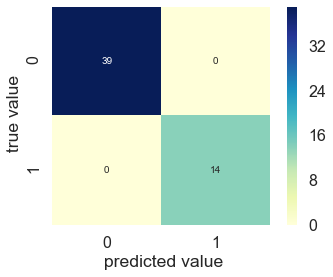

In [141]:
# visualize confusion matrix with heatmap
# VanderPlas (2017)
# class 0 does not have CKD, Class one does have CKD
sns.heatmap( confusion, square = True, annot = True, cmap="YlGnBu", cbar = True) 
print('Confusion Matrix RF on df2:')
plt.xlabel(' predicted value') 
plt.ylabel(' true value');



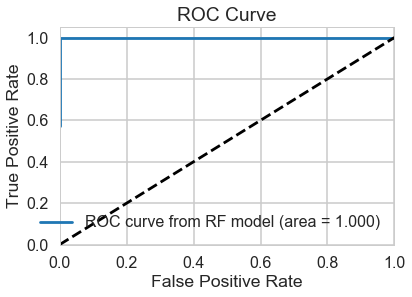

In [142]:
# If accuracy score not equal to one then determine the false positive and true positive rates, code from Myna (2017)
fpr,tpr,roc_auc = auc_scorer(clf_fitted, X_test, y_test, 'RF')


### Validate Model Performance with CV

In [143]:
# VanderPlas (2017).
from sklearn.cross_validation import cross_val_score

In [144]:
# validate the model's performance with cross validation module in Scikit-Learn.  Code from VanderPlas (2017). 
cross_val_score( clf_fitted, X_test, y_test, cv = 5)

array([1., 1., 1., 1., 1.])

The cross validation process confirms initial accuracy score of 100%.

### Feature Importance

In [145]:
# check feature importance for clf code from Gluck (2017)
feature_importances = pd.DataFrame(clf_fitted.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

             importance
rbc            0.185719
ua_spGr        0.157570
Hgb            0.126237
creat          0.116827
ua_alb         0.113034
ua_pus         0.067593
pcv            0.067506
gluc           0.060467
htn            0.056452
Na             0.043548
bun            0.005048
wbc            0.000000
edema          0.000000
appet          0.000000
cad            0.000000
dm             0.000000
age            0.000000
K              0.000000
bp             0.000000
ua_bact        0.000000
ua_pus_clum    0.000000
ua_rbc         0.000000
ua_sug         0.000000
anemia         0.000000


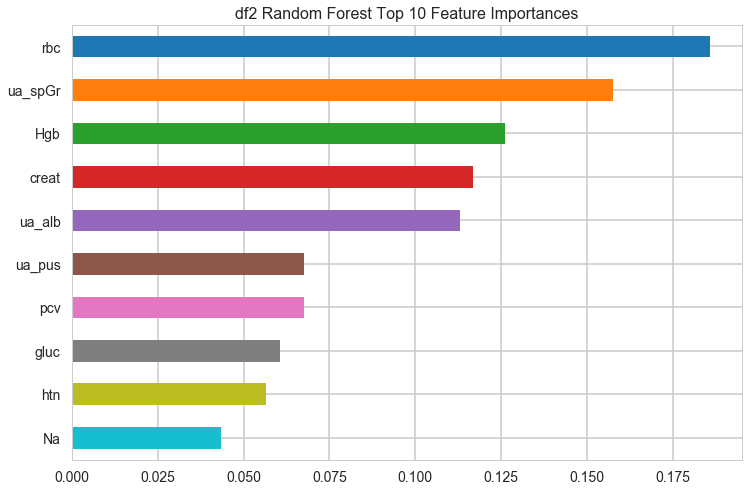

In [146]:
# code adopted from fordy (2018) 
feat_importances = pd.Series(clf_fitted.feature_importances_, index=X_train.columns)
plt.figure(figsize = (12,8))
plt.title('df2 Random Forest Top 10 Feature Importances', fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=14) # code from Autiwa (2012) 
plt.tick_params(axis='both', which='minor', labelsize=14)
feat_importances.nlargest(10).plot(kind='barh')
plt.gca().invert_yaxis()

The top five features for this data set is rbc, urine specific gravity, hemoglobin, creatinine and urine albumin.

### SVM

In [147]:
from sklearn import svm

In [148]:
#import packages to standardize features for SVM
from sklearn import preprocessing

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
# preprocessing train and test data, code from 4.3 Preprocessing data (2017).
scaler = preprocessing.StandardScaler().fit(X_train)

In [151]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [152]:
scaler.mean_

array([4.91333333e+01, 7.40000000e+01, 1.02000000e+00, 8.28571429e-01,
       2.85714286e-01, 1.14285714e-01, 1.90476190e-01, 6.66666667e-02,
       7.61904762e-02, 1.38000000e+02, 5.62857143e+01, 2.33333333e+00,
       1.39219048e+02, 4.40666667e+00, 1.35895238e+01, 4.14380952e+01,
       8.69333333e+03, 4.87238095e+00, 2.19047619e-01, 2.00000000e-01,
       6.66666667e-02, 8.57142857e-01, 1.42857143e-01, 9.52380952e-02])

In [153]:
X_train_scaled = scaler.transform(X_train)

In [154]:
X_train_scaled

array([[ 0.59167321, -0.36927447,  0.        , ...,  0.40824829,
        -0.40824829, -0.32444284],
       [-0.54273783, -0.36927447,  0.        , ...,  0.40824829,
        -0.40824829, -0.32444284],
       [ 0.85859345, -0.36927447,  0.93541435, ...,  0.40824829,
        -0.40824829, -0.32444284],
       ...,
       [ 0.19129284,  1.47709789, -0.93541435, ...,  0.40824829,
        -0.40824829,  3.082207  ],
       [-0.20908752, -1.29246066, -1.87082869, ...,  0.40824829,
        -0.40824829, -0.32444284],
       [ 0.12456278, -1.29246066,  0.93541435, ...,  0.40824829,
        -0.40824829, -0.32444284]])

In [155]:
# confirm the means are zero.
X_train_scaled.mean(axis = 0).round()

array([ 0., -0., -0., -0.,  0.,  0., -0.,  0., -0., -0.,  0., -0.,  0.,
        0.,  0.,  0., -0., -0., -0.,  0., -0.,  0.,  0.,  0.])

In [156]:
# confirm the standard deviations are one.
X_train_scaled.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [157]:
# instantiate svm model
svmdf2 = svm.SVC()

In [158]:
# train the svm on training data
svmdf2_fitted = svmdf2.fit(X_train_scaled, y_train)

In [159]:
# scale testing data
X_test_scaled = scaler.transform(X_test)

In [160]:
# check the scaled testing data to see that the means are zero.
X_test_scaled.mean(axis = 0).round()

array([ 0.,  0., -0., -0., -0., -0., -0.,  0., -0., -0., -0., -0., -0.,
       -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.])

In [161]:
# check that the standard deviation is one.
X_test_scaled.std(axis = 0).round()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [162]:
# predict on new data, code adopted from VanderPlas (2017), Chapter 5.
y_svm = svmdf2_fitted.predict(X_test_scaled)

In [163]:
# VanderPlas (2017)
accuracy_score( y_test, y_svm)

1.0

In [164]:
# code from Myna (2017)
# class 0 does not have CKD, Class one does have CKD
print("Detailed classification report SVM on df2:")
y_true, y_pred = y_test, svmdf2_fitted.predict(X_test_scaled)
print(classification_report(y_true, y_pred))

Detailed classification report SVM on df2:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        39
        1.0       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        53



In [165]:
# code from Myna (2017) 
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix SVM on df2:')
print(confusion)

Confusion Matrix SVM on df2:
[[39  0]
 [ 0 14]]


Confusion Matrix SVM on df2:


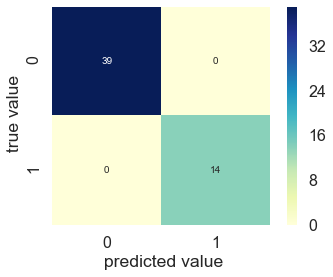

In [166]:
# visualize confusion matrix with heatmap
# VanderPlas (2017) (p. 357).
# class 0 does not have CKD, Class one does have CKD 
print('Confusion Matrix SVM on df2:')
sns.heatmap( confusion, square = True, annot = True, cmap="YlGnBu", cbar = True) 
plt.xlabel(' predicted value') 
plt.ylabel(' true value');

The above classification report and confusion matrix shows that the precision, recall and overall accuracy score for the SVM were 100% accurate.

In [167]:
# validate the model's performance with cross validation module in Scikit-Learn.  Code from VanderPlas (2017).  
cross_val_score( svmdf2_fitted, X_test_scaled, y_test, cv = 5)

array([1., 1., 1., 1., 1.])

The cross validation on the SVM confirmed the initial accuracy of 100%.

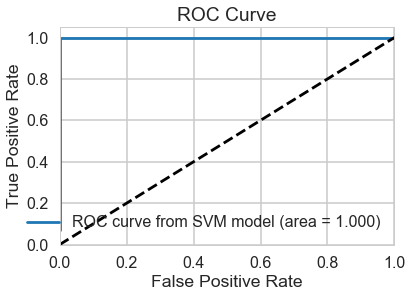

In [168]:
# If accuracy score not equal to one then determine the false positive and true positive rates, code from Myna (2017)
fpr,tpr,roc_auc = auc_scorer(svmdf2_fitted, X_test_scaled, y_test, 'SVM')


### Create New Dataframe with more samples and less features

To gain more experience with data cleansing in Python, I decided to create a second dataframe with more samples to see how the predictive models would perform with more rows.  I used the technique to drop the columns with greater than 15% NaNs as described by Aqlan, Markle and Shamsan (2017).  However, I chose to impute the remaining missing values with the mode since most of the remaining features were categorical.  However, I think that imputing the numerical values with the mean instead of the mode would be more accurate, we'll see.

### Missing Values for second dataset

In [169]:
# drop columns with > 15% NaNs code from pandas.Dataframe.drop (n.d.).
df3 = df.drop(columns=['ua_rbc', 'ua_pus', 'Na', 'K', 'pcv', 'wbc', 'rbc'])
df3. shape

(400, 18)

In [170]:
df3.head()

,age,bp,ua_spGr,ua_alb,ua_sug,ua_pus_clum,ua_bact,gluc,bun,creat,Hgb,htn,dm,cad,appet,edema,anemia,classif
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,121.0,36.0,1.2,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,NaN,18.0,0.8,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,423.0,53.0,1.8,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,117.0,56.0,3.8,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,106.0,26.0,1.4,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [171]:
df3.isnull().sum() 

age             9
bp             12
ua_spGr        47
ua_alb         46
ua_sug         49
ua_pus_clum     4
ua_bact         4
gluc           44
bun            19
creat          17
Hgb            52
htn             2
dm              2
cad             2
appet           1
edema           1
anemia          1
classif         0
dtype: int64

The list above shows the features and the count of NaNs.  There are no missing values in the dependent variable "classif"

In [172]:
 # df3

In [173]:
df3.mode()

,age,bp,ua_spGr,ua_alb,ua_sug,ua_pus_clum,ua_bact,gluc,bun,creat,Hgb,htn,dm,cad,appet,edema,anemia,classif
0,60.0,80.0,1.02,0.0,0.0,0.0,0.0,99.0,46.0,1.2,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [174]:
# Fill in the NaNs with the mode for each column.  code taken from hellpanderr (2015). 
df3_imp = df3.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [175]:
# df3_imp

In [176]:
df3.describe()

,age,bp,ua_spGr,ua_alb,ua_sug,ua_pus_clum,ua_bact,gluc,bun,creat,Hgb,htn,dm,cad,appet,edema,anemia,classif
count,391.000000,388.000000,353.000000,354.000000,351.000000,396.000000,396.000000,356.000000,381.000000,383.000000,348.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.106061,0.055556,148.036517,57.425722,3.072454,12.526437,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.308305,0.229351,79.281714,50.503006,5.741126,2.912587,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,99.000000,27.000000,0.900000,10.300000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,1.300000,12.650000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,163.000000,66.000000,2.800000,15.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,490.000000,391.000000,76.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
# check that there are no NaNs in df3 dataset after the imputation.
df3_imp.isnull().sum() 

age            0
bp             0
ua_spGr        0
ua_alb         0
ua_sug         0
ua_pus_clum    0
ua_bact        0
gluc           0
bun            0
creat          0
Hgb            0
htn            0
dm             0
cad            0
appet          0
edema          0
anemia         0
classif        0
dtype: int64

In [178]:
# find the mode for each feature for after imputation
df3_imp.mode()

,age,bp,ua_spGr,ua_alb,ua_sug,ua_pus_clum,ua_bact,gluc,bun,creat,Hgb,htn,dm,cad,appet,edema,anemia,classif
0,60.0,80.0,1.02,0.0,0.0,0.0,0.0,99.0,46.0,1.2,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [179]:
df3_imp.shape

(400, 18)

### Correlation Between features of DF3_imp

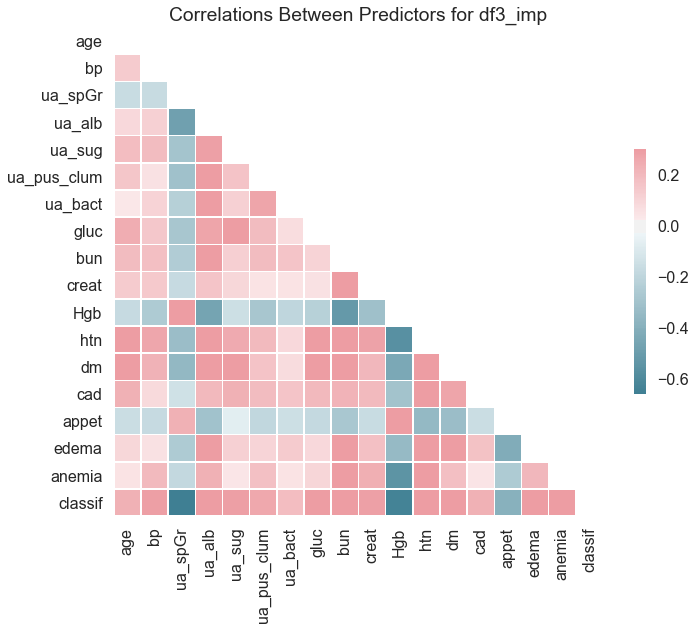

In [180]:
# code from Myna (2017) 
corr_df3 = df3_imp.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df3, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations Between Predictors for df3_imp')
plt.show()

### Train and Test set on df3_imp

In [181]:
# code from Myna (2017) 
X_train, X_test, y_train, y_test = train_test_split(df3_imp.iloc[:,:-1], df3_imp['classif'], 
                                                    test_size = 0.33, random_state=44,
                                                   stratify= df3_imp['classif'] )

In [182]:
# examine second dataset
X_train.head()

,age,bp,ua_spGr,ua_alb,ua_sug,ua_pus_clum,ua_bact,gluc,bun,creat,Hgb,htn,dm,cad,appet,edema,anemia
302,29.0,70.0,1.020,0.0,0.0,0.0,0.0,127.0,44.0,1.2,14.8,0.0,0.0,0.0,1.0,0.0,0.0
93,73.0,100.0,1.010,3.0,2.0,1.0,0.0,295.0,90.0,5.6,9.2,1.0,1.0,1.0,0.0,0.0,0.0
156,66.0,90.0,1.015,2.0,0.0,0.0,1.0,153.0,76.0,3.3,15.0,0.0,0.0,0.0,0.0,0.0,0.0
362,33.0,80.0,1.025,0.0,0.0,0.0,0.0,89.0,19.0,1.1,15.0,0.0,0.0,0.0,1.0,0.0,0.0
206,60.0,70.0,1.010,1.0,0.0,0.0,0.0,109.0,96.0,3.9,13.8,1.0,0.0,0.0,1.0,0.0,0.0


In [183]:
print(X_train.shape)

(268, 17)


In [184]:
print(X_test.shape)

(132, 17)


In [185]:
print(y_train.shape)

(268,)


In [186]:
print(y_test.shape)

(132,)


In [187]:
y_train.value_counts()

1.0    168
0.0    100
Name: classif, dtype: int64

In [188]:
# examine the percent of class labels for y train set.
y_train.value_counts()/len(y_train)*100

1.0    62.686567
0.0    37.313433
Name: classif, dtype: float64

### Run Random Forest on df3_imp

In [189]:
clf2 = RandomForestClassifier(random_state = 22)

In [190]:
clf2_fitted = clf2.fit(X_train, y_train)

In [191]:
# predict on new data, code adopted from VanderPlas (2017), Chapter 5.
y_clf2 = clf2_fitted.predict(X_test)

In [192]:
accuracy_score( y_test, y_clf2)
# VanderPlas, (2017). 

1.0

The above accuracy score is 100%. 

Print a detailed classification report

In [193]:
# code from Myna (2017)
# class 0 does not have CKD, Class one does have CKD
print("Detailed classification Report RF on df3:")
y_true, y_pred = y_test, clf2_fitted.predict(X_test)
print(classification_report(y_true, y_pred))


Detailed classification Report RF on df3:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        50
        1.0       1.00      1.00      1.00        82

avg / total       1.00      1.00      1.00       132



In [194]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)


Confusion Matrix:
[[50  0]
 [ 0 82]]


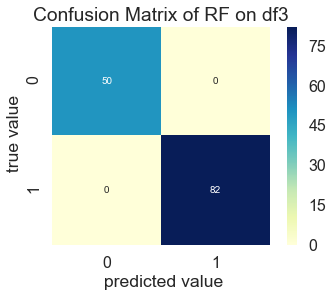

In [195]:
# visualize confusion matrix with heatmap
# code from VanderPlas (2017) (p. 357) and areuexperienced (2015)
# class 0 does not have CKD, Class one does have CKD 
ax = plt.axes()
sns.heatmap( confusion, square = True, annot = True, cbar = True, cmap="YlGnBu", ax = ax)
ax.set_title('Confusion Matrix of RF on df3')
plt.xlabel(' predicted value') 
plt.ylabel(' true value');

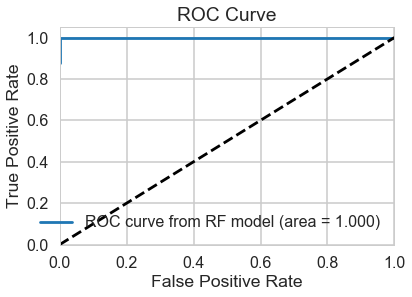

In [196]:
# experiment with ROC curve to determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf2_fitted, X_test, y_test, 'RF')


### Validate clf2 Model Performance with CV

In [197]:
# validate the model's performance with cross validation module in Scikit-Learn.  Code from VanderPlas (2017).  
cross_val_score( clf2_fitted, X_test, y_test, cv = 5)

array([0.96296296, 1.        , 1.        , 1.        , 1.        ])

In [198]:
# check feature importance for clf2 code from Gluck (2017) 
feature_importances = pd.DataFrame(clf2_fitted.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

             importance
creat          0.282257
Hgb            0.218041
ua_spGr        0.105057
ua_alb         0.100787
dm             0.092555
edema          0.043577
bun            0.034268
htn            0.034154
age            0.028407
gluc           0.025342
appet          0.017944
ua_sug         0.011951
bp             0.005661
ua_bact        0.000000
ua_pus_clum    0.000000
cad            0.000000
anemia         0.000000


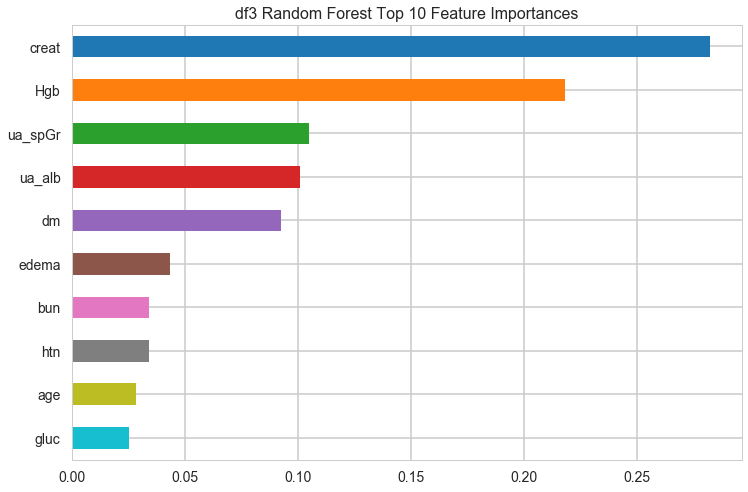

In [199]:
# code adopted from fordy (2018) 
feat_importances = pd.Series(clf2_fitted.feature_importances_, index=X_train.columns)
plt.figure(figsize = (12,8))
plt.title('df3 Random Forest Top 10 Feature Importances', fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=14) # code from Autiwa (2012) 
plt.tick_params(axis='both', which='minor', labelsize=14)
feat_importances.nlargest(10).plot(kind='barh')
plt.gca().invert_yaxis()


The top five features for this data set are creatinine, serum hemoglobin, urine specific gravity, urine albumin and diabetes.  In both data sets the features Hgb (serum hemoglobin) and ua_spGr (urine specific gravity) were in the top  important features.

### SVM on second data set df3

In [200]:
# preprocessing train and test data for SVM, code from 4.3 Preprocessing data (2017) 
scaler = preprocessing.StandardScaler().fit(X_train)

In [201]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [202]:
scaler.mean_

array([5.20970149e+01, 7.66791045e+01, 1.01781716e+00, 8.43283582e-01,
       4.17910448e-01, 9.32835821e-02, 5.97014925e-02, 1.47033582e+02,
       5.55115672e+01, 3.00671642e+00, 1.29119403e+01, 3.54477612e-01,
       3.54477612e-01, 9.32835821e-02, 8.02238806e-01, 1.64179104e-01,
       1.30597015e-01])

In [203]:
X_train_scaled = scaler.transform(X_train)

In [204]:
# examining the scaled training set, code from "Preprocessing data" (2071)
X_train_scaled

array([[-1.40634449, -0.4863502 ,  0.4020951 , ...,  0.49649937,
        -0.44320263, -0.38757527],
       [ 1.27275313,  1.69815014, -1.43998158, ..., -2.01410123,
        -0.44320263, -0.38757527],
       [ 0.84653305,  0.96998336, -0.51894324, ..., -2.01410123,
        -0.44320263, -0.38757527],
       ...,
       [-0.12768427,  0.96998336, -1.43998158, ..., -2.01410123,
         2.2563043 ,  2.58014396],
       [ 0.78564447,  1.69815014, -0.51894324, ...,  0.49649937,
        -0.44320263, -0.38757527],
       [-1.22367875, -1.21451698,  1.32313343, ...,  0.49649937,
        -0.44320263, -0.38757527]])

In [205]:
svmdf3 = svm.SVC()

In [206]:
svmdf3_fitted = svmdf3.fit(X_train_scaled, y_train)

In [207]:
X_test_scaled = scaler.transform(X_test)

In [208]:
# predict on new data, code adopted from VanderPlas (2017), Chapter 5.
y_svm = svmdf3_fitted.predict(X_test_scaled)

In [209]:
# VanderPlas (2017) 
accuracy_score( y_test, y_svm)

0.9924242424242424

In [210]:
# code adopted from Myna (2017)
# class 0 does not have CKD, Class one does have CKD
print("Detailed classification report SVM on df3:")
target_names = ['class 0', 'class 1']
y_true, y_pred = y_test, y_svm
print(classification_report(y_true, y_pred, target_names=target_names))

Detailed classification report SVM on df3:
             precision    recall  f1-score   support

    class 0       0.98      1.00      0.99        50
    class 1       1.00      0.99      0.99        82

avg / total       0.99      0.99      0.99       132



In [211]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix SVM on df3:')
print(confusion)


Confusion Matrix SVM on df3:
[[50  0]
 [ 1 81]]


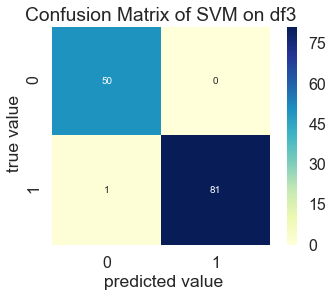

In [212]:
# visualize confusion matrix with heatmap
# code from VanderPlas (2017) (p. 357) and areuexperienced (2015)
# class 0 does not have CKD, Class one does have CKD
ax = plt.axes()
sns.heatmap( confusion, square = True, annot = True, cbar = True, cmap="YlGnBu", ax = ax)
ax.set_title('Confusion Matrix of SVM on df3')
plt.xlabel(' predicted value') 
plt.ylabel(' true value');

The confusion matrix above shows that the SVM on df3 (larger samples, less features) misclassified one class one (CKD) as no CKD.  Therefore, for this SVM, the specificity is 100% and the sensitivity is 99% .  The cost of a false negative is high in this circumstance since we are predicting the presence of a disease state.

Validate SVM model performance with CV

In [213]:
# validate the model's performance with cross validation module in Scikit-Learn.  Code from VanderPlas (2017).  
cross_val_score( svmdf3_fitted, X_test_scaled, y_test, cv = 5)

array([1.        , 1.        , 0.96153846, 0.96153846, 1.        ])

The cross validation results are similar to the accuracy metrics of the SVM on df3.

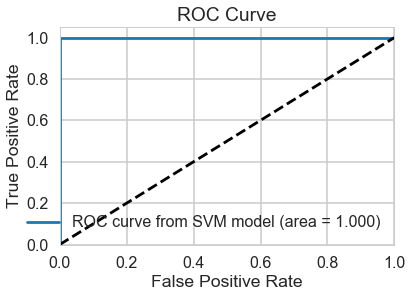

In [214]:
# If accuracy score not equal to one then determine the false positive and true positive rates, code from Myna (2017)
fpr,tpr,roc_auc = auc_scorer(svmdf3_fitted, X_test_scaled, y_test, 'SVM')


### Discussion

The Random Forest Classification model on both data sets yielded 100% accuracy for precision, recall, the f1 score for an overall accuracy score of 100%, which is similar to the results achieved by Aqlan, Markle, and Shamsan (2017), although their data set was constructed differently and contained 320 rows.

The SVM model on the first dataset yielded 100% accuracy metrics, but it was less accurate on the second dataset. The SVM on the second data set resulted in a 99% overall accuracy score and 99% sensitivity or recall. Aqlan, Markle, and Shamsan (2017) achieved at 97.5% overall accuracy for their SVM model on 320 samples and 17 features.

Several conclusions were derived from this project. First, the initial dataset with 158 rows and all features results in 100% accuracy metrics for the Random Forest and the SVM. The random forest performed equally well on the second dataset. However, the SVM did not perform as well on the second dataset (df3) as compared to the first (df2). The second datasets did influence the performance of SVM. Lastly, the dataset is easy to classify using these machine learning techniques.

A chart summarizing the overall accuracy is listed below.


Overall Accuracy Score by Model and Data Set

| Data | SVM | RF |
|:---|:---:|:---:|
| df2 (158 samples, 24 features) | 100% | 100% |
| df3 (400 samples, 17 features)| 99% | 100% |
| Aqlan, Markle & Shamsan (2017)|97.5%| 100% |

### References

About Chronic Kidney Disease. (2017). National Kidney Foundation.  Retrieved from https://www.kidney.org/atoz/content/about-chronic-kidney-disease

Aqlan, F., Markle, R., and Shamsan, A. (2017).  Data mining for chronic kidney disease prediction.  Proceedings of the 2017 Industrial and Systems Engineering Conference.  Retrieved from https://www.researchgate.net/publication/317231517_Data_Mining_for_Chronic_Kidney_Disease_Prediction

Autiwa. (2012, July 8). Matplotlib make tick labels font size smaller. Retrieved from  https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller

Blood urea nitrogen (BUN) test (n.d.). Mayo Clinic.  Retrieved from https://www.mayoclinic.org/tests-procedures/blood-urea-nitrogen/about/pac-20384821

Complete blood count (CBC). (2018).  Mayo Clinic.  Retrieved from https://www.mayoclinic.org/tests-procedures/complete-blood-count/about/pac-20384919

EdChum. (2015, January 28). Best way to count the number of rows with missing values in a pandas dataframe. Retrieved from https://stackoverflow.com/questions/28199524/best-way-to-count-the-number-of-rows-with-missing-values-in-a-pandas-dataframe 

fordy. (2018, March 7). matplotlib: Plot feature importance with feature names.  Retrieved from https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names

Ghadban, R. (2014, February 11). Specifiy gravity.  Medscape.  Retrieved from  https://emedicine.medscape.com/article/2090711-overview#a4

Gluck, C. (2017, September 7). Running random forests?  Inspect the feature importances with this code.  Retrieved from https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e

hellpanderr. (2015, September 16). Imputation of missing values for categories in pandas.  Retrieved from https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas

Hematocrit. (2018). Wikipedia. Retrieved from https://en.wikipedia.org/wiki/Hematocrit

Hemoglobin test. (2018). Mayo Clinic. Retrieved from https://www.mayoclinic.org/tests-procedures/hemoglobin-test/about/pac-20385075

Isma. (2017, October 30). Display all dataframe columns in a jupyter python notebook.  Retreived from https://stackoverflow.com/questions/47022070/display-all-dataframe-columns-in-a-jupyter-python-notebook

jezrael. (2017, March 17). Pandas, get count of a single value in a column of a dataframe.  Retrieved from https://stackoverflow.com/questions/36067894/pandas-get-count-of-a-single-value-in-a-column-of-a-dataframe

McKinney, W. (2012, December 3). Pandas dataframe: Remove unwanted parts from strings in a column. Retrieved from https://stackoverflow.com/questions/13682044/pandas-dataframe-remove-unwanted-parts-from-strings-in-a-column

McMaster, R. (2017, March 24).  How do I get a summary count of missing/NaN data by column in 'pandas'?  Retrieved from https://stackoverflow.com/questions/22257527/how-do-i-get-a-summary-count-of-missing-nan-data-by-column-in-pandas

Myna. (2017). Predicting Chronic Kidney Disease.  Retrieved from https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease/notebook

ngoldbaum. (2017, March 1).  Cannot get histogram to show separated bins with vertical lines.  Retrieved from https://stackoverflow.com/questions/42542252/cannot-get-histogram-to-show-separated-bins-with-vertical-lines

pandas.Dataframe.drop. (n.d.). Retrieved from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

4.3.Preprocessing data. (2017). scikitlearn.  Retrieved from http://scikit-learn.org/stable/modules/preprocessing.html

Rood, E. (2018).  Select rows from a pandas dataframe based on values in a column.  Retrieved from https://erikrood.com/Python_References/rows_cols_python.html

Urine specific gravity. (2018, August 20). Retrieved from https://en.wikipedia.org/wiki/Urine_specific_gravity

UCI Machine Learning Repository. (2015). Retrieved from https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease

VanderPlas, J. (2017). Python Data Science Handbook: Essential Tools for Working with Data. Chapter 5 Machine Learning.  O'Reilly Media. Kindle Edition.